# POS with NetworkX in articles

In [1]:
""" Description
▪ Write a pipeline coding of part of speech (POS) tagging that can be represented by network graph .
▪ Do pre-processing on the data just to be able to run it.
▪ Feel free to use any technique can help to solve this problem .
▪ Do optimization time for article to represent every word in article .
✓ U can use Deep Learning Methods and show the diff and which one the best.(optional)


What to turn in:
1) Project documentation (details given below)
2) Report any resource you use
3) Your source code Jupyter Notebook with comment """


' Description\n▪ Write a pipeline coding of part of speech (POS) tagging that can be represented by network graph .\n▪ Do pre-processing on the data just to be able to run it.\n▪ Feel free to use any technique can help to solve this problem .\n▪ Do optimization time for article to represent every word in article .\n✓ U can use Deep Learning Methods and show the diff and which one the best.(optional)\n\n\nWhat to turn in:\n1) Project documentation (details given below)\n2) Report any resource you use\n3) Your source code Jupyter Notebook with comment '

# What is POS ?
The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, or simply POS-tagging.

## 1- Method ONE 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize

# sample article
article = """Cyshield employs world-class Digital professionals with cutting edge knowledge and experience . 
             Our wide experience in the digital space makes us the best choice for your company needs and our focus on 
             highly specialized areas allows us to deliver superior consultation services that are the best in the market."""

# remove special characters, digits, and extra spaces
article = article.lower()
article = re.sub('[^A-Za-z\s]+', '', article)
article = ' '.join(article.split())


# tokenize the article
tokens = word_tokenize(article)

# perform part-of-speech tagging
pos_tags = nltk.pos_tag(tokens)


In [3]:
# Meaning of POS with Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(article)


for token in doc:
    print('Words is   : ' , token.text)
    print('POS is   : ' , token.pos ,'===',token.pos_  , '===', spacy.explain(token.pos_))
    print('-----------------------')

Words is   :  cyshield
POS is   :  92 === NOUN === noun
-----------------------
Words is   :  employs
POS is   :  100 === VERB === verb
-----------------------
Words is   :  worldclass
POS is   :  92 === NOUN === noun
-----------------------
Words is   :  digital
POS is   :  84 === ADJ === adjective
-----------------------
Words is   :  professionals
POS is   :  92 === NOUN === noun
-----------------------
Words is   :  with
POS is   :  85 === ADP === adposition
-----------------------
Words is   :  cutting
POS is   :  100 === VERB === verb
-----------------------
Words is   :  edge
POS is   :  92 === NOUN === noun
-----------------------
Words is   :  knowledge
POS is   :  92 === NOUN === noun
-----------------------
Words is   :  and
POS is   :  89 === CCONJ === coordinating conjunction
-----------------------
Words is   :  experience
POS is   :  100 === VERB === verb
-----------------------
Words is   :  our
POS is   :  95 === PRON === pronoun
-----------------------
Words is   :  w

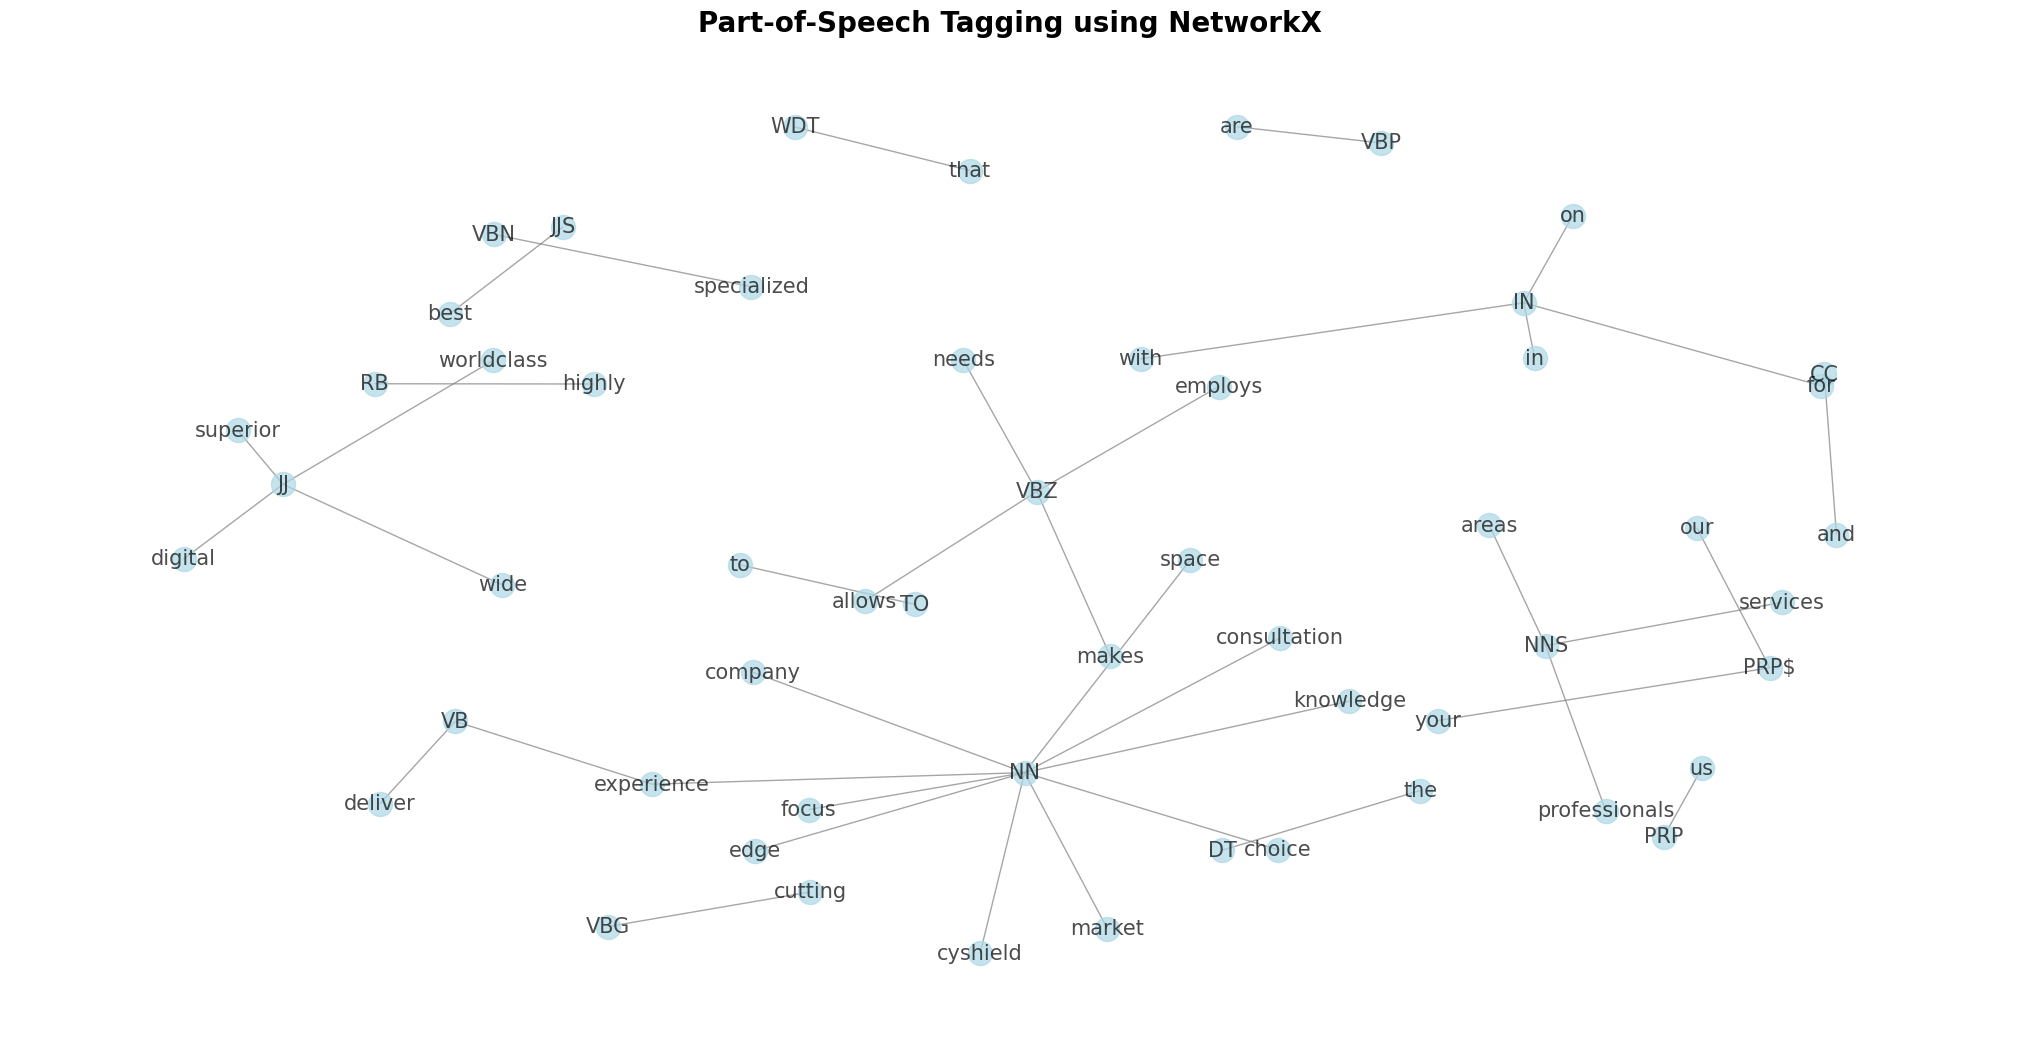

In [4]:
# create a graph
G = nx.Graph()

# add nodes to the graph
for pos in set(tag for word, tag in pos_tags):
    G.add_node(pos)


# add edges to the graph
for word, tag in pos_tags:
    for node in G.copy().nodes():
        if tag == node:
            G.add_edge(tag, word)

# draw the graph
plt.figure(figsize=(20,10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, font_size=15, node_color='lightblue', edge_color='gray', width=1, alpha=0.7)
plt.title("Part-of-Speech Tagging using NetworkX", fontsize=20, fontweight='bold')  # set title
plt.axis('off')  # hide axis
plt.show()

## 2-  Method TWO

In [5]:
# The NLTK library has a number of corpora which contains word and its POS tag
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
conll_corpus = conll2000.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + brown_corpus + conll_corpus

# print len tagged_sentences
print(len(tagged_sentences))


72202


In [6]:
# let's look at the data
tagged_sentences[9]

[('There', 'DET'),
 ('is', 'VERB'),
 ('no', 'DET'),
 ('asbestos', 'NOUN'),
 ('in', 'ADP'),
 ('our', 'PRON'),
 ('products', 'NOUN'),
 ('now', 'ADV'),
 ('.', '.'),
 ("''", '.')]

In [7]:
# Divide data in words (X) and tags (Y)
X = [] # store input sequence
Y = [] # store output sequence

for sentence in tagged_sentences:
    X_sentence = []
    Y_sentence = []
    for entity in sentence:         
        X_sentence.append(entity[0])  # entity[0] contains the word
        Y_sentence.append(entity[1])  # entity[1] contains corresponding tag
        
    X.append(X_sentence)
    Y.append(Y_sentence)

In [8]:
# Check the total number of words and tags
num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))

print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 72202
Vocabulary size: 59448
Total number of tags: 12


In [9]:
# let's look at first data point
print('sample X: ', X[0], '\n')
print('sample Y: ', Y[0], '\n')

sample X:  ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.'] 

sample Y:  ['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.'] 



In [10]:
# In this many-to-many problem, the length of each input and output sequence must be the same.
# Since each word is tagged, it's important to make sure that the length of input sequence equals the output sequence
sample_idx = 9
print("Length of sample input sequence  : {}".format(len(X[sample_idx])))
print("Length of sample output sequence : {}".format(len(Y[sample_idx])))

Length of sample input sequence  : 10
Length of sample output sequence : 10


In [11]:
# Encode X and Y to integer values
from keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(X)                    # fit tokenizer on data
X_encoded = word_tokenizer.texts_to_sequences(X)  # use the tokenizer to encode input sequence

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [12]:
# look at first encoded X,Y 

print("** Raw data **", "\n")
print('X: ', X[sample_idx], '\n')
print('Y: ', Y[sample_idx], '\n')
print()
print("** Encoded data **", "\n")
print('X: ', X_encoded[sample_idx], '\n')
print('Y: ', Y_encoded[sample_idx], '\n')

** Raw data ** 

X:  ['There', 'is', 'no', 'asbestos', 'in', 'our', 'products', 'now', '.', "''"] 

Y:  ['DET', 'VERB', 'DET', 'NOUN', 'ADP', 'PRON', 'NOUN', 'ADV', '.', '.'] 


** Encoded data ** 

X:  [52, 11, 67, 8061, 8, 101, 464, 92, 3, 14] 

Y:  [5, 2, 5, 1, 4, 8, 1, 7, 3, 3] 



In [13]:
# make sure that each sequence of input and output is same length

different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


In [14]:
# Pad sequences
from keras_preprocessing.sequence import pad_sequences

MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [15]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded


In [16]:
# load word2vec-google-news-300 from gensim
import gensim
import gensim.downloader
 
google_news_vectors = gensim.downloader.load('word2vec-google-news-300') 


In [17]:
# Check the pre-trained model using Gensimd
capital = google_news_vectors.most_similar(["Paris", "Britain"], ["France"])
print(capital)

[('London', 0.7541897892951965)]


In [18]:
import numpy as np
# assign word vectors from word2vec model
EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = google_news_vectors[word]
    except KeyError:
        pass

In [19]:
# check embedding dimension
print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (59449, 300)


In [20]:
# Use one-hot encoding for output sequences (Y)
from keras.utils.np_utils import to_categorical

Y = to_categorical(Y)

# print Y of the first output sequqnce
print(Y.shape)

(72202, 100, 13)


In [21]:
# split entire data into training and testing sets
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)

# split training data into training and validation sets
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=4)

In [22]:
# print number of samples in each set
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (52165, 100)
Shape of output sequences: (52165, 100, 13)
VALIDATION DATA
Shape of input sequences: (9206, 100)
Shape of output sequences: (9206, 100, 13)
TESTING DATA
Shape of input sequences: (10831, 100)
Shape of output sequences: (10831, 100, 13)


In [24]:
# 2. Vanilla RNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model


# total number of tags
NUM_CLASSES = Y.shape[2]

# create architecture
rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(input_dim     =  VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                        output_dim    =  EMBEDDING_SIZE,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        weights       = [embedding_weights],      # word embedding matrix
                        trainable     =  True                     # True - update the embeddings while training
))

# add an RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, 
              return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
))

# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))    


rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

rnn_model.summary()


rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_validation, Y_validation))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          17834700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDistr  (None, 100, 13)          845       
 ibuted)                                                         
                                                                 
Total params: 17,858,905
Trainable params: 17,858,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
408/408 [==============================] - 79s 188ms/step - loss: 0.1899 - acc: 0.9613 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 2/5
408/408 [==============================] - 77s 189ms/step - loss: 0.0269 - acc: 0.9910 - val_loss:

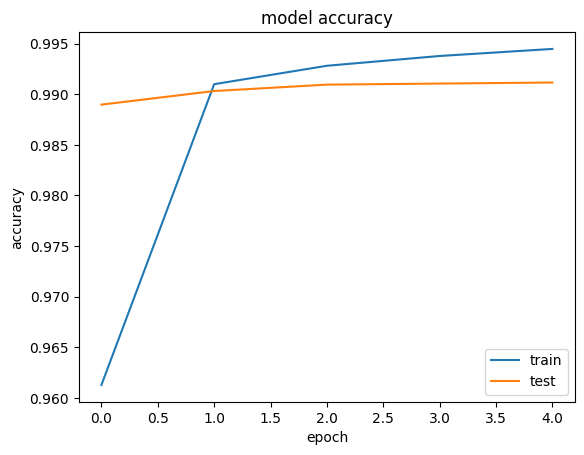

In [25]:
# visualise training history
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [26]:
# Model evaluation
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

339/339 [==============================] - 6s 18ms/step - loss: 0.0246 - acc: 0.9913
Loss: 0.02461792342364788,
Accuracy: 0.9912676811218262
